<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:300%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            text-align: center;"><u><b>CUSTOMER CHURN PREDICTION</b></u>
</div>


<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>IMPORT NEEDED LIBRARIES </b>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>DATASET LOADING ... </b>
</div>

In [3]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>DISPLAY A SAMPLE ... </b>
</div>

In [4]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
751,9477-LGWQI,Male,0,Yes,Yes,70,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),80.15,5600.15,No
188,0956-SYCWG,Female,0,No,No,13,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,19.65,244.8,No
3552,6999-CHVCF,Male,0,No,No,68,Yes,Yes,Fiber optic,Yes,...,Yes,No,No,Yes,Two year,Yes,Bank transfer (automatic),102.10,7149.35,No
4232,3066-RRJIO,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,69.95,69.95,Yes
5938,9971-ZWPBF,Male,1,Yes,Yes,34,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,108.90,3625.2,No


<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>DATASET GENERAL INFORMATION </b>
</div>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 7043 entries, 0 to 7042

Data columns (total 21 columns):

 #   Column            Non-Null Count  Dtype  

---  ------            --------------  -----  

 0   customerID        7043 non-null   object 

 1   gender            7043 non-null   object 

 2   SeniorCitizen     7043 non-null   int64  

 3   Partner           7043 non-null   object 

 4   Dependents        7043 non-null   object 

 5   tenure            7043 non-null   int64  

 6   PhoneService      7043 non-null   object 

 7   MultipleLines     7043 non-null   object 

 8   InternetService   7043 non-null   object 

 9   OnlineSecurity    7043 non-null   object 

 10  OnlineBackup      7043 non-null   object 

 11  DeviceProtection  7043 non-null   object 

 12  TechSupport       7043 non-null   object 

 13  StreamingTV       7043 non-null   object 

 14  StreamingMovies   7043 non-null   object 

 15  Contract          7043 non-null   object 

 16  PaperlessBilling  704

<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>DATA PRE-PROCESSING ... </b>
</div>

<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>CustomerID </b>
</div>

<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>


  Drop customerID column as it is useless for the Model
   
    


In [6]:
df.drop('customerID',axis='columns',inplace=True)

<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>Gender </b>
</div>

In [7]:
df['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

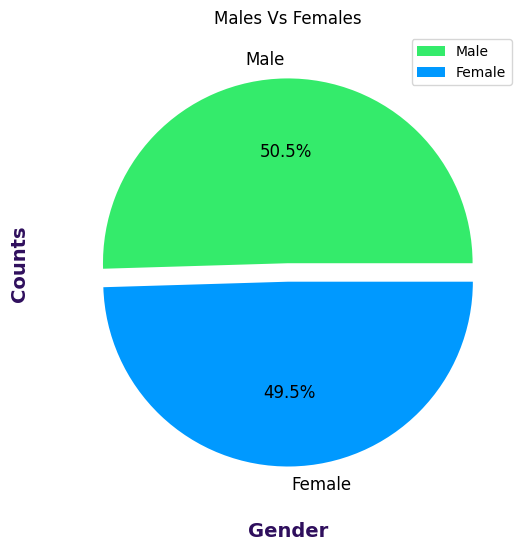

In [8]:
colors = ["#34eb6b" , "#0099ff"]

plt.figure(figsize = (20, 6))

counts = df["gender"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%.1f%%')
plt.title('Males Vs Females')
plt.xlabel('Gender', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.ylabel('Counts', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.legend(labels = counts.index, loc = "best")
plt.show()

<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>


 Convert 'Male' to 0 and 'Female' to 1
 

In [9]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>Partner </b>
</div>

In [10]:
df['Partner'].value_counts()

Partner
No     3641
Yes    3402
Name: count, dtype: int64

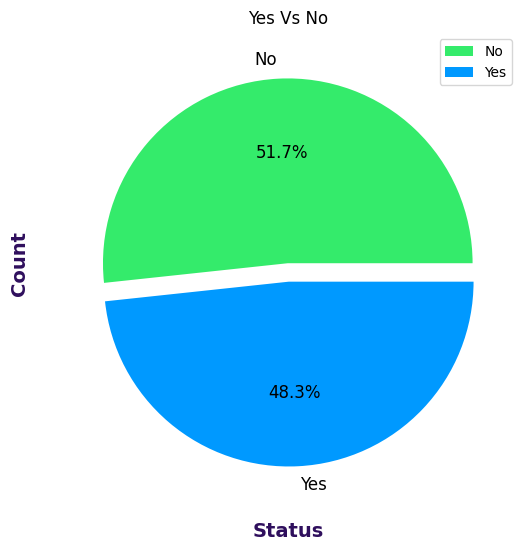

In [104]:
colors = ["#34eb6b" , "#0099ff"]

plt.figure(figsize = (20, 6))

counts = df["Partner"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%.1f%%')
plt.title('Yes Vs No')
plt.xlabel('Status', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.ylabel('Count', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.legend(labels = counts.index, loc = "best")
plt.show()

<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>


 Convert 'No' to 0 and 'Yes' to 1
 

In [120]:
df['Partner'] = df['Partner'].map({'No': 0, 'Yes': 1})

<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b> Dependents </b>
</div>

In [106]:
df['Dependents'].value_counts()

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

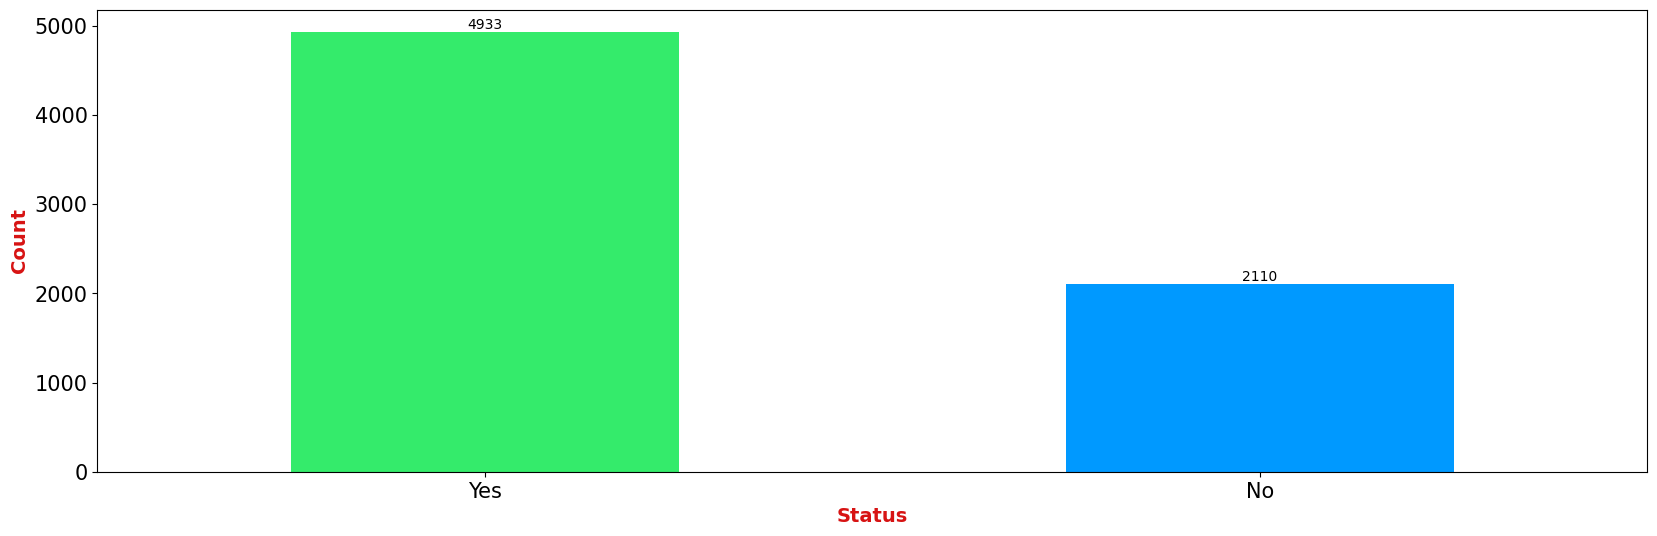

In [107]:
colors = ["#34eb6b" , "#0099ff"]

plt.figure(figsize = (20, 6))

ax = df["Dependents"].value_counts().plot(kind = 'bar', color = colors[:2], rot = 0)
ax.set_xticklabels(('Yes', 'No'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)

plt.xlabel('Status', weight = "bold", color = "#D71313", fontsize = 14)
plt.ylabel('Count', weight = "bold", color = "#D71313", fontsize = 14);

<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>


 Convert 'No' to 0 and 'Yes' to 1
 

In [11]:
df['Dependents'] = df['Dependents'].map({'No': 0, 'Yes': 1})

<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>PhoneService </b>
</div>

In [109]:
df['PhoneService'].value_counts()

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

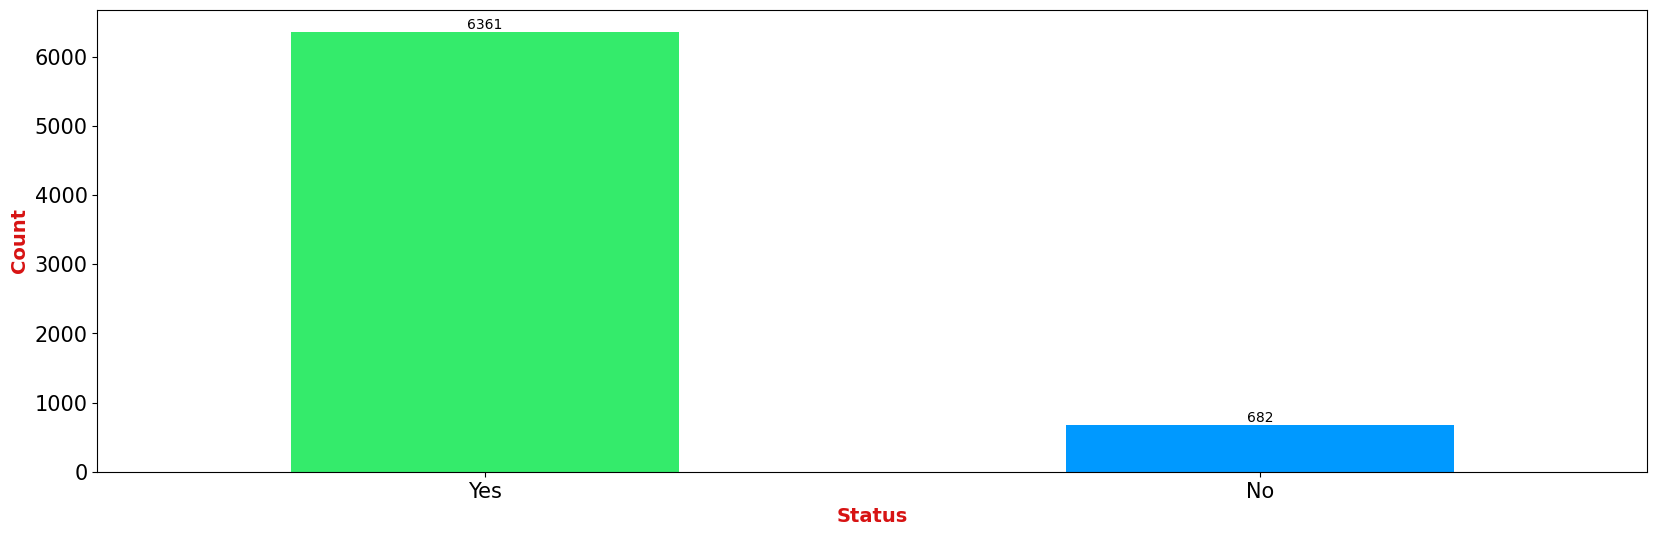

In [110]:
colors = ["#34eb6b" , "#0099ff"]

plt.figure(figsize = (20, 6))

ax = df["PhoneService"].value_counts().plot(kind = 'bar', color = colors[:2], rot = 0)
ax.set_xticklabels(('Yes', 'No'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)

plt.xlabel('Status', weight = "bold", color = "#D71313", fontsize = 14)
plt.ylabel('Count', weight = "bold", color = "#D71313", fontsize = 14);

<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>


 Convert 'No' to 0 and 'Yes' to 1
 

In [12]:
df['PhoneService'] = df['PhoneService'].map({'No': 0, 'Yes': 1})

<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>MultipleLines </b>
</div>

In [123]:
df['MultipleLines'].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

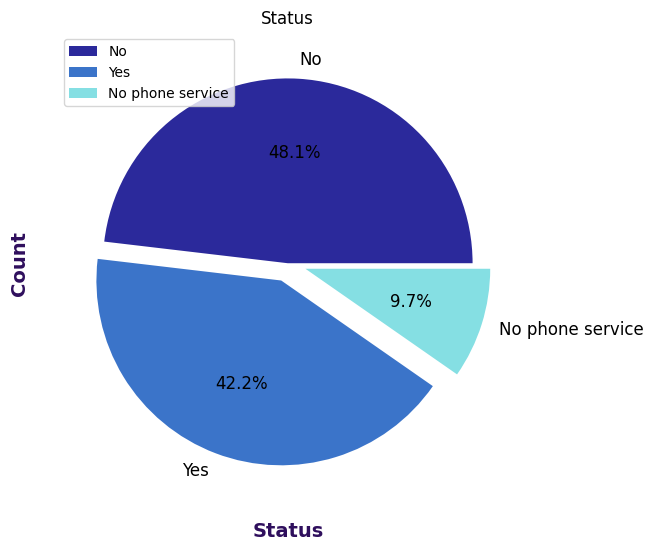

In [113]:
colors = ["#2B299B" , "#3B74C9" , "#85DFE3"]

plt.figure(figsize = (20, 6))

counts = df["MultipleLines"].value_counts()
explode = (0, 0.1  , 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%.1f%%')
plt.title('Status')
plt.xlabel('Status', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.ylabel('Count', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.legend(labels = counts.index, loc = "best")
plt.show()

<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>

    
 Convert 'No phone service' to 0 &  Convert 'No' to 0 and 'Yes' to 1
 

In [13]:
mapping_dict = {'No phone service': 0, 'No': 0, 'Yes': 1}

df['MultipleLines'] = df['MultipleLines'].map(mapping_dict)

<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>[InternetService, Contract, PaymentMethod] </b>
</div>

<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>Using sklearn OneHotEncoder </b>
</div>

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
df.InternetService = le.fit_transform(df.InternetService)

In [16]:
df.Contract = le.fit_transform(df.Contract)

In [17]:
df.PaymentMethod = le.fit_transform(df.PaymentMethod)

<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>DISPLAT ANOTHER SAMPLE .. </b>
</div>

In [135]:
df.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2684,0,0,0,0,69,1,1,1,No,Yes,No,Yes,Yes,Yes,1,Yes,0,105.20,7386.05,No
1830,0,0,0,1,32,1,0,2,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,2,No,3,20.50,696.8,No
6638,0,0,0,0,57,1,0,2,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,2,No,3,20.75,1118.8,No
530,1,0,1,1,24,1,0,2,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,2,Yes,1,21.10,490.65,No


<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>

    
To avoid redundancy, One function to pre-process them all 
 

In [18]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [19]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>TotalCharges</b>
</div>

<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>

Check the Null Values ...    
 

In [143]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull().sum()

11

In [144]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,1,0,1,1,0,0,0,0,1,0,1,1,1,0,2,1,0,52.55,,0
753,0,0,0,1,0,1,0,2,0,0,0,0,0,0,2,0,3,20.25,,0
936,1,0,1,1,0,1,0,0,1,1,1,0,1,1,2,0,3,80.85,,0
1082,0,0,1,1,0,1,1,2,0,0,0,0,0,0,2,0,3,25.75,,0
1340,1,0,1,1,0,0,0,0,1,1,1,1,1,0,2,0,1,56.05,,0
3331,0,0,1,1,0,1,0,2,0,0,0,0,0,0,2,0,3,19.85,,0
3826,0,0,1,1,0,1,1,2,0,0,0,0,0,0,2,0,3,25.35,,0
4380,1,0,1,1,0,1,0,2,0,0,0,0,0,0,2,0,3,20.00,,0
5218,0,0,1,1,0,1,0,2,0,0,0,0,0,0,1,1,3,19.70,,0
6670,1,0,1,1,0,1,1,0,0,1,1,1,1,0,2,0,3,73.35,,0


In [145]:
df.shape

(7043, 20)

<div style = 'border : 3px solid non; background-color:#e3e3e3
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>

Remove rows with space in TotalCharges    
 

In [20]:
df = df[df.TotalCharges!=' ']
df.shape

(7032, 20)

<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>MinMaxScaler</b>
</div>

In [21]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [149]:
df[cols_to_scale ].sample(5)

,tenure,MonthlyCharges,TotalCharges
1709,0.408451,0.505970,0.239453
1997,0.929577,0.869652,0.773033
4764,0.014085,0.267662,0.009197
47,0.014085,0.620896,0.014465
1810,0.985915,0.765174,0.779143


<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>DATASET FINAL SUMMARY </b>
</div>

In [150]:
def summary(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary_df['missing#'] = df.isna().sum()
    summary_df['missing%'] = (df.isna().sum())/len(df)
    summary_df['unique'] = df.nunique().values
    summary_df['count'] = df.count().values
    return summary_df

summary(df).style.background_gradient(cmap='Blues')

,dtypes,missing#,missing%,unique,count
gender,int64,0,0.000000,2,7032
SeniorCitizen,int64,0,0.000000,2,7032
Partner,int64,0,0.000000,2,7032
Dependents,int64,0,0.000000,2,7032
tenure,float64,0,0.000000,72,7032
PhoneService,int64,0,0.000000,2,7032
MultipleLines,int64,0,0.000000,2,7032
InternetService,int32,0,0.000000,3,7032
OnlineSecurity,int64,0,0.000000,2,7032
OnlineBackup,int64,0,0.000000,2,7032


<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>Determine Predictor & Target</b>
</div>

In [22]:
X = df.drop('Churn',axis='columns')
y = df['Churn']

In [153]:
X.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2338,0,0,1,1,1.000000,1,0,2,0,0,0,0,0,0,2,0,0,0.016915,0.150479
541,1,0,0,0,0.140845,1,1,0,0,0,0,0,0,1,0,1,3,0.404975,0.067251
6732,1,0,0,0,0.323944,1,1,1,0,0,0,1,0,1,0,1,2,0.709453,0.258545


In [154]:
y.sample(3)

3101    0
5638    1
3016    1
Name: Churn, dtype: int64

<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>DATA SPLIT ...</b>
</div>

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [156]:
X_train.shape

(5625, 19)

In [157]:
X_test.shape

(1407, 19)

<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>BUILDING THE ANN MODEL </b>
</div>

In [24]:
import tensorflow as tf
from tensorflow import keras

In [32]:
model = keras.Sequential([
    keras.layers.Dense(15, input_shape=(19,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [37]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100

176/176 [==============================] - 2s 3ms/step - loss: 0.4223 - accuracy: 0.7964

Epoch 2/100

176/176 [==============================] - 1s 3ms/step - loss: 0.4203 - accuracy: 0.7986

Epoch 3/100

176/176 [==============================] - 1s 3ms/step - loss: 0.4180 - accuracy: 0.8004

Epoch 4/100

176/176 [==============================] - 1s 5ms/step - loss: 0.4153 - accuracy: 0.8011

Epoch 5/100

176/176 [==============================] - 1s 5ms/step - loss: 0.4141 - accuracy: 0.8043

Epoch 6/100

176/176 [==============================] - 0s 3ms/step - loss: 0.4136 - accuracy: 0.8021

Epoch 7/100

176/176 [==============================] - 1s 4ms/step - loss: 0.4126 - accuracy: 0.8048

Epoch 8/100

176/176 [==============================] - 1s 5ms/step - loss: 0.4102 - accuracy: 0.8069

Epoch 9/100

176/176 [==============================] - 1s 5ms/step - loss: 0.4110 - accuracy: 0.8046

Epoch 10/100

176/176 [==============================] - 1s 6ms/step - lo

<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>MODEL EVALUATION </b>
</div>

In [38]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 1s 4ms/step - loss: 0.4662 - accuracy: 0.7740


[0.46622705459594727, 0.7739872336387634]

<div style="padding:10px;
            color:#30efe0;
            background-color:#000000;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:10px;
            border-style: ridge;
            border-color: #9fc5e8;
            overflow:hidden;
            font-weight:400;
            "><b>MODEL METRICS </b>
</div>

In [39]:
from sklearn.metrics import confusion_matrix , classification_report

In [42]:
yp = model.predict(X_test)

y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

44/44 [==============================] - 0s 2ms/step


In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support



           0       0.82      0.87      0.85       999

           1       0.63      0.53      0.57       408



    accuracy                           0.77      1407

   macro avg       0.73      0.70      0.71      1407

weighted avg       0.76      0.77      0.77      1407




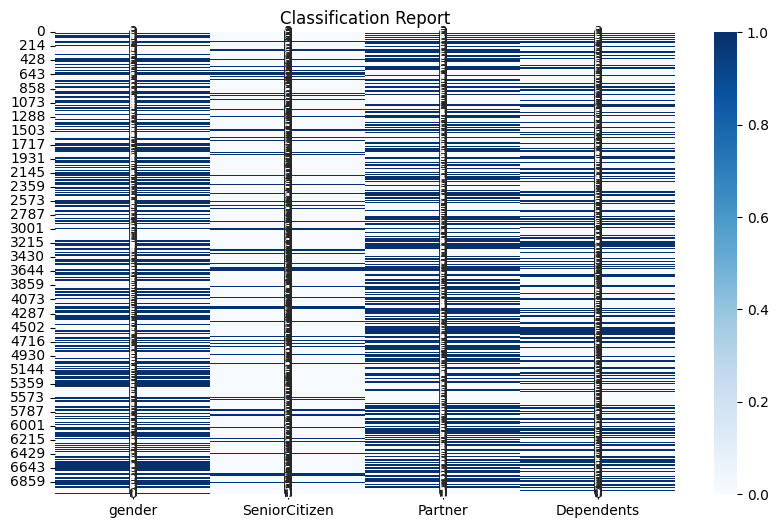

In [47]:
report = classification_report(y_test, y_pred, output_dict=True)
rep = pd.DataFrame(report).transpose()

# Create a heatmap of the classification report
plt.figure(figsize=(10, 6))
sns.heatmap(df.iloc[:-1, :4], annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()

In [49]:
# Extract metrics for each class
classes = [str(key) for key in range(len(report) - 3)]  # Extract class labels
precision = [report[key]['precision'] for key in classes]
recall = [report[key]['recall'] for key in classes]
f1_score = [report[key]['f1-score'] for key in classes]

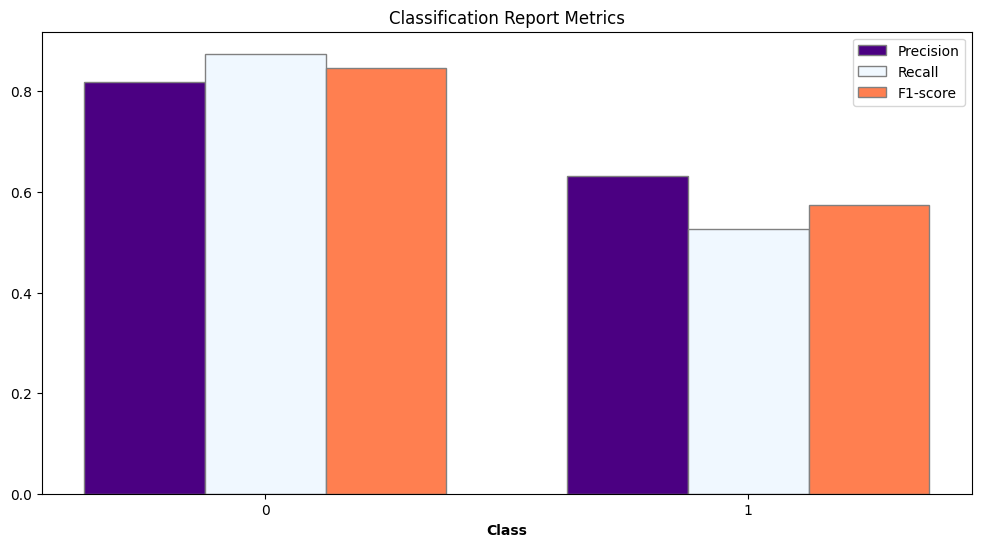

In [56]:
# Plotting the metrics using a bar chart
plt.figure(figsize=(12, 6))
barWidth = 0.25
r1 = range(len(classes))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, precision, color='#4b0082', width=barWidth, edgecolor='grey', label='Precision')
plt.bar(r2, recall, color='#f0f8ff', width=barWidth, edgecolor='grey', label='Recall')
plt.bar(r3, f1_score, color='#ff7f50', width=barWidth, edgecolor='grey', label='F1-score')

plt.xlabel('Class', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(classes))], classes)
plt.legend()
plt.title("Classification Report Metrics")
plt.show()

Text(95.72222222222221, 0.5, 'Truth')

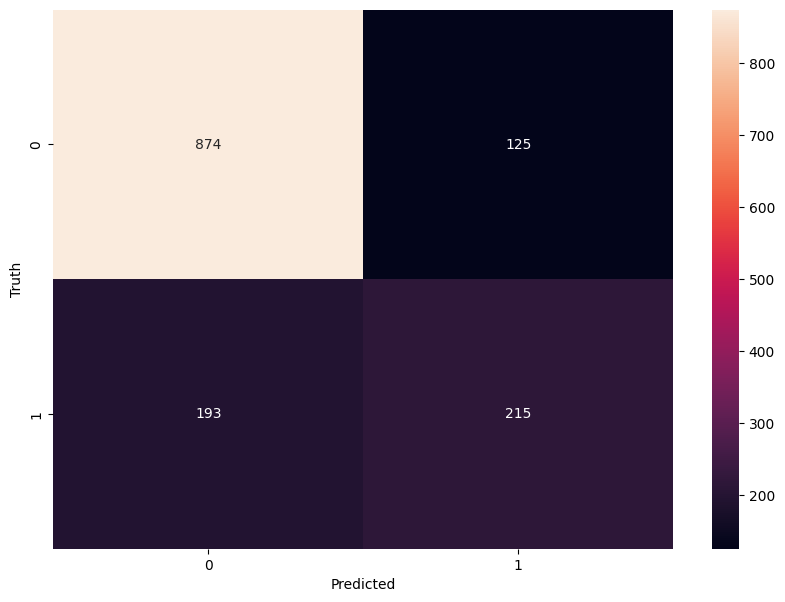

In [46]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')